In [42]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd

#### data

In [2]:
df_ag = pd.read_csv('Opioid_Age_Groups.csv')
df_s = pd.read_csv('Opioid_Summary.csv')

In [3]:
df_ag.describe()

,Year,FIPS Code,Rate,VDH Health District Case Rate,VDH Health Region Case Rate,Virginia Hospital & Healthcare Preparedness Region Case Rate,Virginia Department of Emergency Management Region Case Rate,Community Service Board Case Rate,Virginia State Police Division Case Rate,Virginia State Case Rate
count,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000,40964.000000
mean,2014.000000,51263.992481,20.035336,19.238422,19.681891,19.707731,20.097927,19.472803,19.899563,17.069481
std,2.000024,270.862299,66.759621,48.141090,39.643513,44.110298,45.227169,49.658054,45.436637,31.413304
min,2011.000000,51001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,51069.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,51139.000000,0.000000,1.700000,4.200000,3.900000,3.700000,0.000000,3.700000,5.050000
75%,2016.000000,51550.000000,6.300000,17.000000,18.800000,18.300000,18.600000,16.800000,18.100000,18.375000
max,2017.000000,51840.000000,2832.000000,783.300000,273.900000,559.100000,477.500000,862.100000,537.400000,173.300000


In [4]:
df_ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40964 entries, 0 to 40963
Data columns (total 29 columns):
Year                                                                     40964 non-null int64
FIPS Code                                                                40964 non-null int64
Locality                                                                 40964 non-null object
Source                                                                   40964 non-null object
Type                                                                     40964 non-null object
Age Group                                                                40964 non-null object
Case Count Display                                                       40964 non-null object
Rate                                                                     40964 non-null float64
VDH Health District                                                      40964 non-null object
VDH Health District Case Count Displa

In [5]:
df_ag.head()

,Year,FIPS Code,Locality,Source,Type,Age Group,Case Count Display,Rate,VDH Health District,VDH Health District Case Count Display,...,Virginia Department of Emergency Management Region Case Rate,Community Service Board,Community Service Board Case Count Display,Community Service Board Case Rate,Virginia State Police Division,Virginia State Police Division Case Count Display,Virginia State Police Division Case Rate,Virginia State,Virginia State Case Count Display,Virginia State Case Rate
0,2011,51001,Accomack,ED,ED Heroin Overdose,0-14,0,0.0,Eastern Shore,0,...,0.0,Eastern Shore Community Services Board,0,0.0,VSP Division 5,0,0.0,Virginia State,0,0.0
1,2011,51003,Albemarle,ED,ED Heroin Overdose,0-14,0,0.0,Thomas Jefferson,0,...,0.0,Region Ten Community Services Board,0,0.0,VSP Division 3,0,0.0,Virginia State,0,0.0
2,2011,51005,Alleghany,ED,ED Heroin Overdose,0-14,0,0.0,Alleghany,0,...,0.0,Alleghany Highlands Community Services Board,0,0.0,VSP Division 6,0,0.0,Virginia State,0,0.0
3,2011,51007,Amelia,ED,ED Heroin Overdose,0-14,0,0.0,Piedmont,0,...,0.0,Crossroads Community Services Board,0,0.0,VSP Division 1,0,0.0,Virginia State,0,0.0
4,2011,51009,Amherst,ED,ED Heroin Overdose,0-14,0,0.0,Central Virginia,0,...,0.0,Horizon Behavioral Health,0,0.0,VSP Division 3,0,0.0,Virginia State,0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cbd43c8>,
      dtype=object)

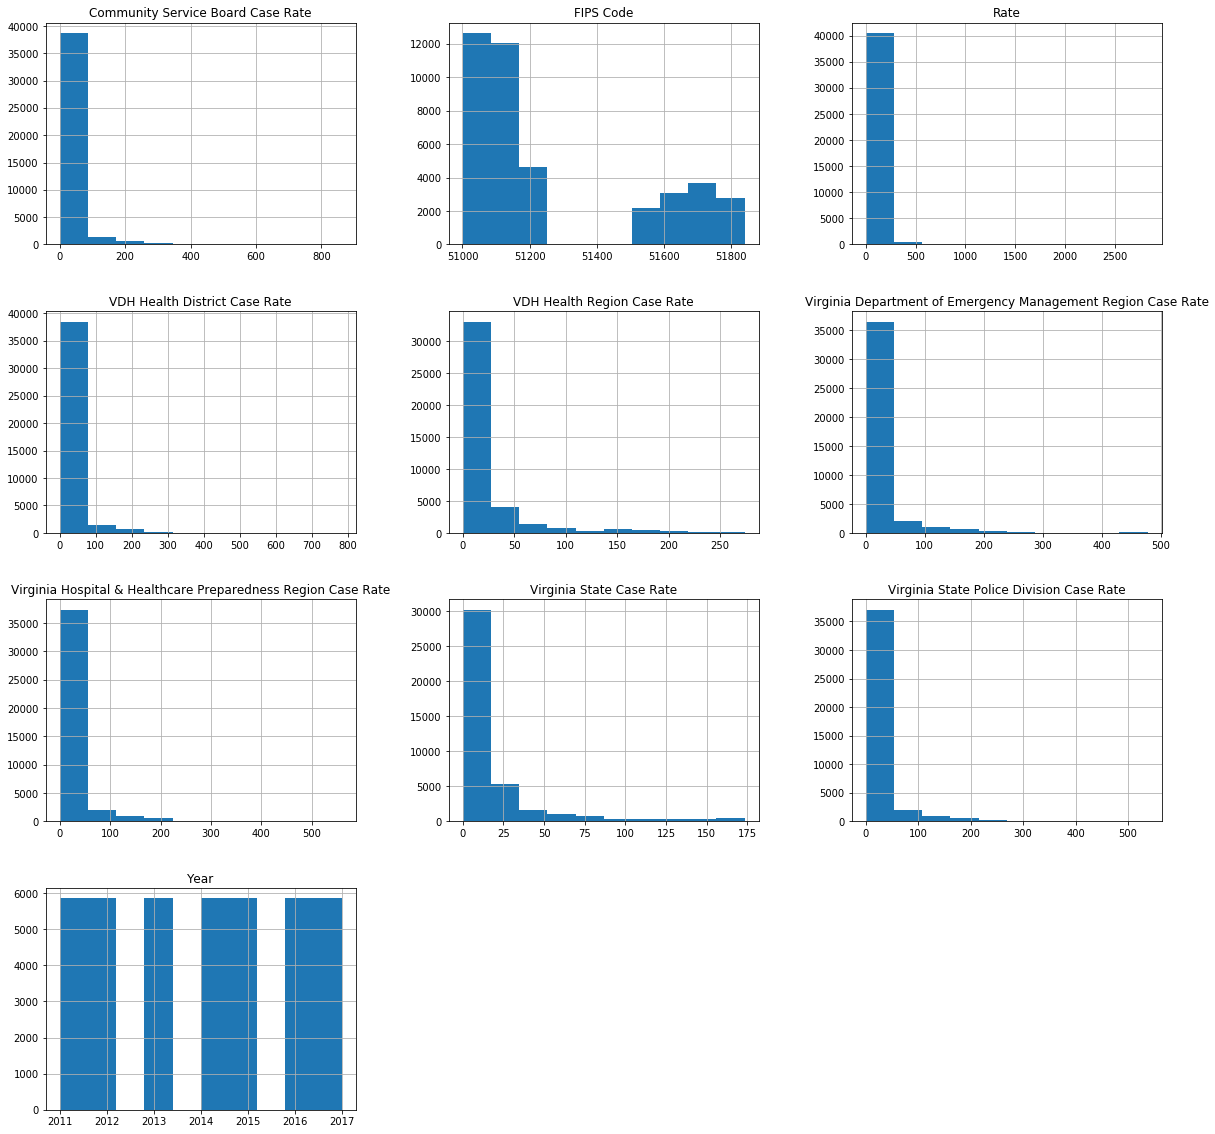

In [6]:
df_ag.hist(figsize=(20,20))

if there is null

In [7]:
sample_incomplete_rows = df_ag[df_ag.isnull().any(axis=1)]
sample_incomplete_rows

,Year,FIPS Code,Locality,Source,Type,Age Group,Case Count Display,Rate,VDH Health District,VDH Health District Case Count Display,...,Virginia Department of Emergency Management Region Case Rate,Community Service Board,Community Service Board Case Count Display,Community Service Board Case Rate,Virginia State Police Division,Virginia State Police Division Case Count Display,Virginia State Police Division Case Rate,Virginia State,Virginia State Case Count Display,Virginia State Case Rate


### handle the data with *

In [8]:
df_ag[2100:2120]

,Year,FIPS Code,Locality,Source,Type,Age Group,Case Count Display,Rate,VDH Health District,VDH Health District Case Count Display,...,Virginia Department of Emergency Management Region Case Rate,Community Service Board,Community Service Board Case Count Display,Community Service Board Case Rate,Virginia State Police Division,Virginia State Police Division Case Count Display,Virginia State Police Division Case Rate,Virginia State,Virginia State Case Count Display,Virginia State Case Rate
2100,2011,51610,Falls Church,EMS,EMS Narcan,15-24,0,0.0,Fairfax,0,...,6.6,Fairfax- Falls Church Community Services Board,0,0.0,VSP Division 7,16,6.0,Virginia State,117,10.4
2101,2011,51620,Franklin City,EMS,EMS Narcan,15-24,*,90.7,Western Tidewater,*,...,5.0,Western Tidewater Community Services Board,*,5.6,VSP Division 5,15,5.4,Virginia State,117,10.4
2102,2011,51630,Fredericksburg,EMS,EMS Narcan,15-24,*,16.0,Rappahannock,7,...,24.2,Rappahannock Area Community Services Board,7,14.1,VSP Division 2,21,17.1,Virginia State,117,10.4
2103,2011,51640,Galax,EMS,EMS Narcan,15-24,0,0.0,Mount Rogers,*,...,19.9,Mount Rogers Community Services Board,0,0.0,VSP Division 4,12,23.1,Virginia State,117,10.4
2104,2011,51650,Hampton,EMS,EMS Narcan,15-24,0,0.0,Hampton,0,...,5.0,Hampton-Newport News Community Services Board,*,1.9,VSP Division 5,15,5.4,Virginia State,117,10.4
2105,2011,51660,Harrisonburg,EMS,EMS Narcan,15-24,0,0.0,Central Shenandoah,*,...,6.7,Harrisonburg-Rockingham Community Services Board,0,0.0,VSP Division 2,21,17.1,Virginia State,117,10.4
2106,2011,51670,Hopewell,EMS,EMS Narcan,15-24,*,101.3,Crater,6,...,14.3,District 19 Community Services Board,6,26.1,VSP Division 1,26,14.2,Virginia State,117,10.4
2107,2011,51678,Lexington,EMS,EMS Narcan,15-24,0,0.0,Central Shenandoah,*,...,15.9,Rockbridge Area Community Services,0,0.0,VSP Division 6,18,14.8,Virginia State,117,10.4
2108,2011,51680,Lynchburg,EMS,EMS Narcan,15-24,0,0.0,Central Virginia,0,...,6.7,Horizon Behavioral Health,0,0.0,VSP Division 3,9,8.7,Virginia State,117,10.4
2109,2011,51683,Manassas City,EMS,EMS Narcan,15-24,*,54.6,Prince William,12,...,6.6,Prince William County Community Services Board,12,19.3,VSP Division 7,16,6.0,Virginia State,117,10.4


In [9]:
df_ag.columns

Index(['Year', 'FIPS Code', 'Locality', 'Source', 'Type', 'Age Group',
       'Case Count Display', 'Rate', 'VDH Health District',
       'VDH Health District Case Count Display',
       'VDH Health District Case Rate', 'VDH Health Region',
       'VDH Health Region Case Count Display', 'VDH Health Region Case Rate',
       'Virginia Hospital & Healthcare Preparedness Region',
       'Virginia Hospital & Healthcare Preparedness Region Case Count Display',
       'Virginia Hospital & Healthcare Preparedness Region Case Rate',
       'Virginia Department of Emergency Management Region',
       'Virginia Department of Emergency Management Region Case Count Display',
       'Virginia Department of Emergency Management Region Case Rate',
       'Community Service Board', 'Community Service Board Case Count Display',
       'Community Service Board Case Rate', 'Virginia State Police Division',
       'Virginia State Police Division Case Count Display',
       'Virginia State Police Division 

In [10]:
df_ag.insert(6, 'is_star_caseCountDisplay', 0)
df_ag[2100:2120]

,Year,FIPS Code,Locality,Source,Type,Age Group,is_star_caseCountDisplay,Case Count Display,Rate,VDH Health District,...,Virginia Department of Emergency Management Region Case Rate,Community Service Board,Community Service Board Case Count Display,Community Service Board Case Rate,Virginia State Police Division,Virginia State Police Division Case Count Display,Virginia State Police Division Case Rate,Virginia State,Virginia State Case Count Display,Virginia State Case Rate
2100,2011,51610,Falls Church,EMS,EMS Narcan,15-24,0,0,0.0,Fairfax,...,6.6,Fairfax- Falls Church Community Services Board,0,0.0,VSP Division 7,16,6.0,Virginia State,117,10.4
2101,2011,51620,Franklin City,EMS,EMS Narcan,15-24,0,*,90.7,Western Tidewater,...,5.0,Western Tidewater Community Services Board,*,5.6,VSP Division 5,15,5.4,Virginia State,117,10.4
2102,2011,51630,Fredericksburg,EMS,EMS Narcan,15-24,0,*,16.0,Rappahannock,...,24.2,Rappahannock Area Community Services Board,7,14.1,VSP Division 2,21,17.1,Virginia State,117,10.4
2103,2011,51640,Galax,EMS,EMS Narcan,15-24,0,0,0.0,Mount Rogers,...,19.9,Mount Rogers Community Services Board,0,0.0,VSP Division 4,12,23.1,Virginia State,117,10.4
2104,2011,51650,Hampton,EMS,EMS Narcan,15-24,0,0,0.0,Hampton,...,5.0,Hampton-Newport News Community Services Board,*,1.9,VSP Division 5,15,5.4,Virginia State,117,10.4
2105,2011,51660,Harrisonburg,EMS,EMS Narcan,15-24,0,0,0.0,Central Shenandoah,...,6.7,Harrisonburg-Rockingham Community Services Board,0,0.0,VSP Division 2,21,17.1,Virginia State,117,10.4
2106,2011,51670,Hopewell,EMS,EMS Narcan,15-24,0,*,101.3,Crater,...,14.3,District 19 Community Services Board,6,26.1,VSP Division 1,26,14.2,Virginia State,117,10.4
2107,2011,51678,Lexington,EMS,EMS Narcan,15-24,0,0,0.0,Central Shenandoah,...,15.9,Rockbridge Area Community Services,0,0.0,VSP Division 6,18,14.8,Virginia State,117,10.4
2108,2011,51680,Lynchburg,EMS,EMS Narcan,15-24,0,0,0.0,Central Virginia,...,6.7,Horizon Behavioral Health,0,0.0,VSP Division 3,9,8.7,Virginia State,117,10.4
2109,2011,51683,Manassas City,EMS,EMS Narcan,15-24,0,*,54.6,Prince William,...,6.6,Prince William County Community Services Board,12,19.3,VSP Division 7,16,6.0,Virginia State,117,10.4


In [11]:
df_ag['is_star_caseCountDisplay'] = df_ag['Case Count Display'].apply(\
                                             lambda x: 1 if x=='*' else 0)
df_ag['Case Count Display'] = df_ag['Case Count Display'].apply(\
                                             lambda x: 0 if x=='*' else x)
df_ag[2470:2480]

,Year,FIPS Code,Locality,Source,Type,Age Group,is_star_caseCountDisplay,Case Count Display,Rate,VDH Health District,...,Virginia Department of Emergency Management Region Case Rate,Community Service Board,Community Service Board Case Count Display,Community Service Board Case Rate,Virginia State Police Division,Virginia State Police Division Case Count Display,Virginia State Police Division Case Rate,Virginia State,Virginia State Case Count Display,Virginia State Case Rate
2470,2011,51161,Roanoke County,EMS,EMS Narcan,45-54,1,0,13.9,Alleghany,...,26.3,Blue Ridge Behavioral Healthcare,10,26.2,VSP Division 6,29,26.1,Virginia State,197,16.3
2471,2011,51163,Rockbridge,EMS,EMS Narcan,45-54,1,0,29.4,Central Shenandoah,...,26.3,Rockbridge Area Community Services,*,55.4,VSP Division 6,29,26.1,Virginia State,197,16.3
2472,2011,51165,Rockingham,EMS,EMS Narcan,45-54,1,0,17.2,Central Shenandoah,...,10.6,Harrisonburg-Rockingham Community Services Board,*,12.9,VSP Division 2,34,27.4,Virginia State,197,16.3
2473,2011,51167,Russell,EMS,EMS Narcan,45-54,0,5,109.0,Cumberland Plateau,...,49.5,Cumberland Mountain Community Services,10,66.1,VSP Division 4,34,50.4,Virginia State,197,16.3
2474,2011,51169,Scott,EMS,EMS Narcan,45-54,1,0,87.8,Lenowisco,...,49.5,Planning District One Behavioral Health Services,7,51.9,VSP Division 4,34,50.4,Virginia State,197,16.3
2475,2011,51171,Shenandoah,EMS,EMS Narcan,45-54,1,0,15.9,Lord Fairfax,...,30.1,Northwestern Community Services,10,28.3,VSP Division 2,34,27.4,Virginia State,197,16.3
2476,2011,51173,Smyth,EMS,EMS Narcan,45-54,1,0,63.6,Mount Rogers,...,49.5,Mount Rogers Community Services Board,10,55.8,VSP Division 4,34,50.4,Virginia State,197,16.3
2477,2011,51175,Southampton,EMS,EMS Narcan,45-54,1,0,85.9,Western Tidewater,...,11.9,Western Tidewater Community Services Board,*,16.1,VSP Division 5,31,11.8,Virginia State,197,16.3
2478,2011,51177,Spotsylvania,EMS,EMS Narcan,45-54,1,0,20.1,Rappahannock,...,30.1,Rappahannock Area Community Services Board,12,22.4,VSP Division 2,34,27.4,Virginia State,197,16.3
2479,2011,51179,Stafford,EMS,EMS Narcan,45-54,0,6,26.7,Rappahannock,...,6.2,Rappahannock Area Community Services Board,12,22.4,VSP Division 2,34,27.4,Virginia State,197,16.3


In [12]:
df_ag.columns.get_loc('VDH Health District Case Count Display')

10

In [13]:
df_ag.insert(10, 'is_star_VDHCaseCountDisplay', 0)
df_ag['is_star_VDHCaseCountDisplay'] = df_ag['VDH Health District Case Count Display'].apply(\
                                             lambda x: 1 if x=='*' else 0)
df_ag['VDH Health District Case Count Display'] = df_ag['VDH Health District Case Count Display'].apply(\
                                             lambda x: 0 if x=='*' else x)


In [14]:
df_ag['is_star_VDHCaseCountDisplay'][2470:2480]
#df_ag['VDH Health District Case Count Display'][2470:2480]

2470    0
2471    0
2472    0
2473    0
2474    0
2475    0
2476    0
2477    1
2478    0
2479    0
Name: is_star_VDHCaseCountDisplay, dtype: int64

In [15]:
df_ag.columns.get_loc('VDH Health Region Case Count Display')

14

In [16]:
df_ag.insert(14, 'is_star_VDHRegionCaseCountDisplay', 0)
df_ag['is_star_VDHRegionCaseCountDisplay'] = df_ag['VDH Health Region Case Count Display'].apply(\
                                             lambda x: 1 if x=='*' else 0)
df_ag['VDH Health Region Case Count Display'] = df_ag['VDH Health Region Case Count Display'].apply(\
                                             lambda x: 0 if x=='*' else x)

In [17]:
df_ag['is_star_VDHRegionCaseCountDisplay'][1988:1998]
#df_ag['VDH Health Region Case Count Display'][1988:1998]

1988    0
1989    1
1990    0
1991    0
1992    1
1993    0
1994    1
1995    0
1996    0
1997    0
Name: is_star_VDHRegionCaseCountDisplay, dtype: int64

In [18]:
df_ag.columns.get_loc('Virginia Hospital & Healthcare Preparedness Region Case Count Display')

18

In [19]:
df_ag.insert(18, 'is_star_VHaHPRCaseCountDisplay', 0)
df_ag['is_star_VHaHPRCaseCountDisplay'] = df_ag['Virginia Hospital & Healthcare Preparedness Region Case Count Display'].apply(\
                                             lambda x: 1 if x=='*' else 0)
df_ag['Virginia Hospital & Healthcare Preparedness Region Case Count Display'] = df_ag['Virginia Hospital & Healthcare Preparedness Region Case Count Display'].apply(\
                                             lambda x: 0 if x=='*' else x)

In [20]:
df_ag['is_star_VHaHPRCaseCountDisplay'][1988:1998]
df_ag['Virginia Hospital & Healthcare Preparedness Region Case Count Display'][1988:1998]

1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995    13
1996    19
1997    18
Name: Virginia Hospital & Healthcare Preparedness Region Case Count Display, dtype: object

In [21]:
ori = 'Virginia Department of Emergency Management Region Case Count Display'
addnew = 'is_star_VDofEMRCaseCountDisplay'
df_ag.columns.get_loc(ori)

22

In [22]:
def addnewcol(colnum, ori, new):
    df_ag.insert(colnum, new, 0)
    df_ag[new] = df_ag[ori].apply(\
                         lambda x: 1 if x=='*' else 0)
    df_ag[ori] = df_ag[ori].apply(\
                         lambda x: 0 if x=='*' else x)
    print(df_ag[new][1988:2008])
    print(df_ag[ori][1988:2008])

In [23]:
addnewcol(22,ori,addnew)

1988    0
1989    1
1990    0
1991    0
1992    1
1993    0
1994    1
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
Name: is_star_VDofEMRCaseCountDisplay, dtype: int64
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995    14
1996     9
1997    18
1998    25
1999     9
2000     9
2001    19
2002     9
2003    18
2004    18
2005    12
2006    18
2007    25
Name: Virginia Department of Emergency Management Region Case Count Display, dtype: object


In [24]:
ori = 'Community Service Board Case Count Display'
addnew = 'is_star_CSBCaseCountDisplay'
df_ag.columns.get_loc(ori)

26

In [25]:
addnewcol(26,ori,addnew)

1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    1
1997    1
1998    0
1999    0
2000    0
2001    0
2002    1
2003    0
2004    0
2005    0
2006    0
2007    1
Name: is_star_CSBCaseCountDisplay, dtype: int64
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    5
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    8
2007    0
Name: Community Service Board Case Count Display, dtype: object


In [26]:
ori = 'Virginia State Police Division Case Count Display'
addnew = 'is_star_VSPDCaseCountDisplay'
df_ag.columns.get_loc(ori)

30

In [27]:
addnewcol(30,ori,addnew)

1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    1
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
Name: is_star_VSPDCaseCountDisplay, dtype: int64
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995    15
1996     9
1997    18
1998    26
1999     9
2000     9
2001    16
2002     9
2003    18
2004    18
2005    12
2006    18
2007    15
Name: Virginia State Police Division Case Count Display, dtype: object


In [28]:
ori = 'Virginia State Case Count Display'
addnew = 'is_star_VSCaseCountDisplay'
df_ag.columns.get_loc(ori)

34

In [29]:
addnewcol(34,ori,addnew)

1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
Name: is_star_VSCaseCountDisplay, dtype: int64
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995    117
1996    117
1997    117
1998    117
1999    117
2000    117
2001    117
2002    117
2003    117
2004    117
2005    117
2006    117
2007    117
Name: Virginia State Case Count Display, dtype: object


In [30]:
df_ag.to_csv('Opioid_Age_Groups_handle_star.csv',encoding='utf-8',index=False)

In [31]:
df_ag.columns

Index(['Year', 'FIPS Code', 'Locality', 'Source', 'Type', 'Age Group',
       'is_star_caseCountDisplay', 'Case Count Display', 'Rate',
       'VDH Health District', 'is_star_VDHCaseCountDisplay',
       'VDH Health District Case Count Display',
       'VDH Health District Case Rate', 'VDH Health Region',
       'is_star_VDHRegionCaseCountDisplay',
       'VDH Health Region Case Count Display', 'VDH Health Region Case Rate',
       'Virginia Hospital & Healthcare Preparedness Region',
       'is_star_VHaHPRCaseCountDisplay',
       'Virginia Hospital & Healthcare Preparedness Region Case Count Display',
       'Virginia Hospital & Healthcare Preparedness Region Case Rate',
       'Virginia Department of Emergency Management Region',
       'is_star_VDofEMRCaseCountDisplay',
       'Virginia Department of Emergency Management Region Case Count Display',
       'Virginia Department of Emergency Management Region Case Rate',
       'Community Service Board', 'is_star_CSBCaseCountDisplay',

### categories feature with onehot, 

In [45]:
df_ag = pd.read_csv('Opioid_Age_Groups_handle_star.csv')

In [46]:
from future_encoders import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [47]:
df_agdrop = df_ag.drop(['FIPS Code','Locality','Virginia State'],axis=1)
df_agdrop.columns

Index(['Year', 'Source', 'Type', 'Age Group', 'is_star_caseCountDisplay',
       'Case Count Display', 'Rate', 'VDH Health District',
       'is_star_VDHCaseCountDisplay', 'VDH Health District Case Count Display',
       'VDH Health District Case Rate', 'VDH Health Region',
       'is_star_VDHRegionCaseCountDisplay',
       'VDH Health Region Case Count Display', 'VDH Health Region Case Rate',
       'Virginia Hospital & Healthcare Preparedness Region',
       'is_star_VHaHPRCaseCountDisplay',
       'Virginia Hospital & Healthcare Preparedness Region Case Count Display',
       'Virginia Hospital & Healthcare Preparedness Region Case Rate',
       'Virginia Department of Emergency Management Region',
       'is_star_VDofEMRCaseCountDisplay',
       'Virginia Department of Emergency Management Region Case Count Display',
       'Virginia Department of Emergency Management Region Case Rate',
       'Community Service Board', 'is_star_CSBCaseCountDisplay',
       'Community Service Board

In [48]:
sample_incomplete_rows = df_agdrop[df_agdrop.isnull().any(axis=1)].head()
sample_incomplete_rows

,Year,Source,Type,Age Group,is_star_caseCountDisplay,Case Count Display,Rate,VDH Health District,is_star_VDHCaseCountDisplay,VDH Health District Case Count Display,...,is_star_CSBCaseCountDisplay,Community Service Board Case Count Display,Community Service Board Case Rate,Virginia State Police Division,is_star_VSPDCaseCountDisplay,Virginia State Police Division Case Count Display,Virginia State Police Division Case Rate,is_star_VSCaseCountDisplay,Virginia State Case Count Display,Virginia State Case Rate


In [49]:
cate = ['Source','Type','Age Group','is_star_caseCountDisplay',\
        'VDH Health District','is_star_VDHCaseCountDisplay','VDH Health Region',\
       'is_star_VDHRegionCaseCountDisplay','Virginia Hospital & Healthcare Preparedness Region',\
       'is_star_VHaHPRCaseCountDisplay','Virginia Department of Emergency Management Region',\
       'is_star_VDofEMRCaseCountDisplay','Community Service Board','is_star_CSBCaseCountDisplay',\
       'Virginia State Police Division','is_star_VSPDCaseCountDisplay',\
       'is_star_VSCaseCountDisplay']
nums = ['Year','Case Count Display','Rate','VDH Health District Case Count Display',\
       'VDH Health District Case Rate','VDH Health Region Case Count Display',\
       'VDH Health Region Case Rate','Virginia Hospital & Healthcare Preparedness Region Case Count Display',\
       'Virginia Hospital & Healthcare Preparedness Region Case Rate',\
       'Virginia Department of Emergency Management Region Case Count Display',\
       'Virginia Department of Emergency Management Region Case Rate',\
       'Community Service Board Case Count Display','Community Service Board Case Rate',\
       'Virginia State Police Division Case Count Display','Virginia State Police Division Case Rate',\
       'Virginia State Case Count Display','Virginia State Case Rate']

In [50]:
df_num = df_agdrop.drop(cate, axis=1)

In [51]:
df_num.head()

,Year,Case Count Display,Rate,VDH Health District Case Count Display,VDH Health District Case Rate,VDH Health Region Case Count Display,VDH Health Region Case Rate,Virginia Hospital & Healthcare Preparedness Region Case Count Display,Virginia Hospital & Healthcare Preparedness Region Case Rate,Virginia Department of Emergency Management Region Case Count Display,Virginia Department of Emergency Management Region Case Rate,Community Service Board Case Count Display,Community Service Board Case Rate,Virginia State Police Division Case Count Display,Virginia State Police Division Case Rate,Virginia State Case Count Display,Virginia State Case Rate
0,2011,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,2011,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,2011,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,2011,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,2011,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
num_pipeline = Pipeline([
        #('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [54]:
from sklearn.compose import ColumnTransformer
numsdf = list(df_num)
catedf = cate
fullpipe = ColumnTransformer([
    ("num", num_pipeline, numsdf),
    ("cat", OneHotEncoder(), catedf),
])

In [55]:
df_ag_prepared = fullpipe.fit_transform(df_agdrop)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [56]:
type(df_ag_prepared)

scipy.sparse.csr.csr_matrix

In [57]:
df_ag_prepared = df_ag_prepared.toarray()

In [58]:
type(df_ag_prepared)

numpy.ndarray

In [59]:
df_ag_prepared.shape

(40964, 155)

## clustering

In [61]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=10,)

In [66]:
df_ag_prepared_pca = pca.fit_transform(df_ag_prepared)

In [68]:
df_ag_prepared_pca.shape

(40964, 10)

### mean shift

In [139]:
#bandwidth = estimate_bandwidth(df_ag_prepared_pca, quantile=0.3)
ms = MeanShift(bandwidth=8)
ms.fit(df_ag_prepared_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 4


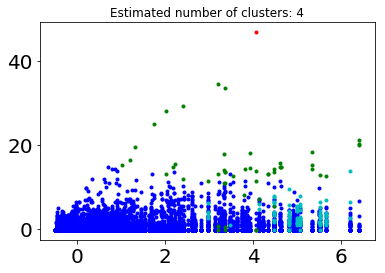

In [140]:
import pylab as pl
from itertools import cycle

pl.figure(1)
pl.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    pl.plot(df_ag_prepared[my_members,6], df_ag_prepared[my_members,1], col+'.')
    #pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #                               markeredgecolor='k', markersize=14)
pl.title('Estimated number of clusters: %d' % n_clusters_)
pl.show()

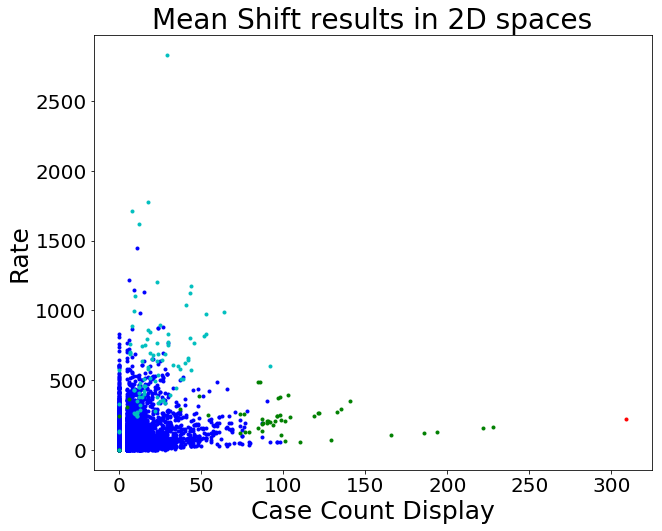

In [145]:
import pylab as pl
from itertools import cycle

pl.figure(1,figsize=(10,8))
pl.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    pl.plot(df_ag.iloc[my_members]['Case Count Display'],\
            df_ag.iloc[my_members]['Rate'],\
            col+'.',\
    
           )
    #pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #                               markeredgecolor='k', markersize=14)
#pl.title('Estimated number of clusters: %d' % n_clusters_)
pl.title('Mean Shift results in 2D spaces', fontsize=28)
pl.xlabel('Case Count Display',fontsize=25)
pl.ylabel('Rate',fontsize=25)
pl.savefig('meanshift1.png')

pl.show()

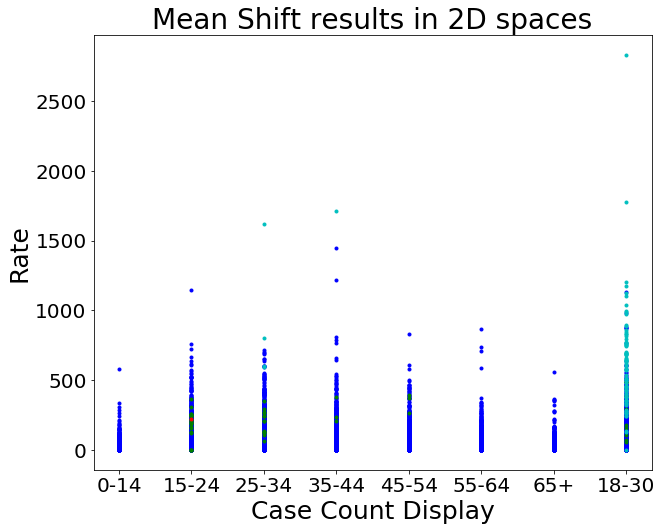

In [146]:
import pylab as pl
from itertools import cycle

pl.figure(1,figsize=(10,8))
pl.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    pl.plot(df_ag.iloc[my_members]['Age Group'],\
            df_ag.iloc[my_members]['Rate'],\
            col+'.',\
    
           )
    #pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #                               markeredgecolor='k', markersize=14)
#pl.title('Estimated number of clusters: %d' % n_clusters_)
pl.title('Mean Shift results in 2D spaces', fontsize=28)
pl.xlabel('Case Count Display',fontsize=25)
pl.ylabel('Rate',fontsize=25)
pl.savefig('meanshift2.png')

pl.show()

### k means

In [115]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=43)
km.fit(df_ag_prepared_pca)
labels = km.labels_
cluster_centers = km.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


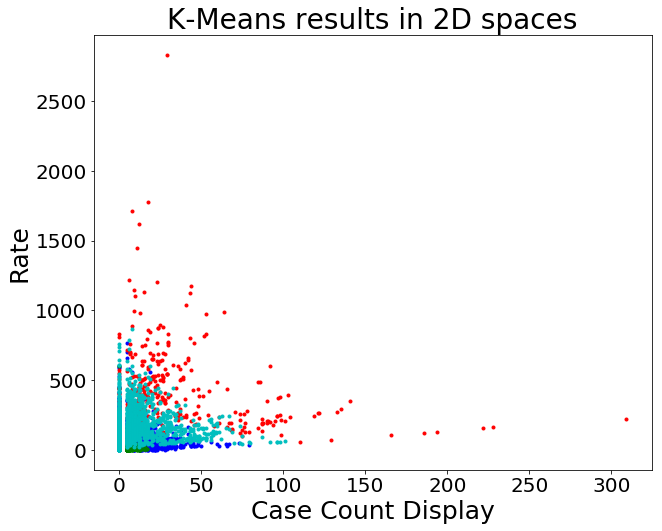

In [133]:
import pylab as pl
from itertools import cycle

pl.figure(1,figsize=(10,8))
pl.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    pl.plot(df_ag.iloc[my_members]['Case Count Display'],\
            df_ag.iloc[my_members]['Rate'],\
            col+'.',\
            
           )
    #pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #                               markeredgecolor='k', markersize=14)
#pl.title('Estimated number of clusters: %d' % n_clusters_, fontsize=28)
pl.title('K-Means results in 2D spaces', fontsize=28)
pl.xlabel('Case Count Display',fontsize=25)
pl.ylabel('Rate',fontsize=25)
pl.savefig('kmeans1.png')
pl.show()

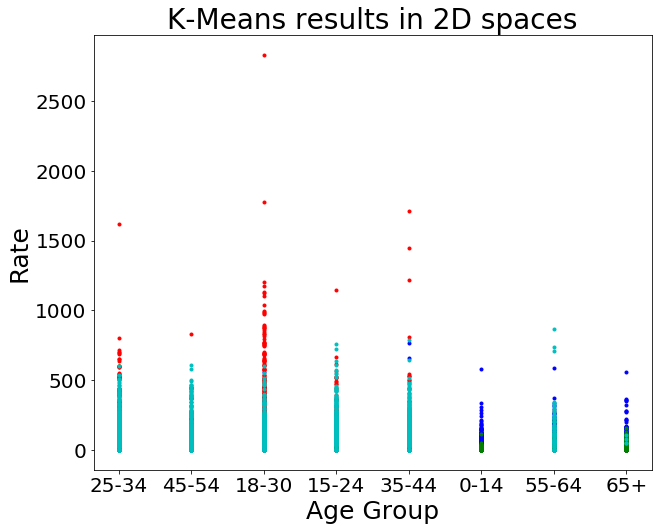

In [135]:
import pylab as pl
from itertools import cycle

pl.figure(1,figsize=(10,8))
pl.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    pl.plot(df_ag.iloc[my_members]['Age Group'],\
            df_ag.iloc[my_members]['Rate'],\
            col+'.',\
    
           )
    #pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #                               markeredgecolor='k', markersize=14)
pl.title('K-Means results in 2D spaces', fontsize=28)
pl.xlabel('Age Group',fontsize=25)
pl.ylabel('Rate',fontsize=25)
pl.savefig('kmeans2.png')
pl.show()